In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## Reading the data

In [2]:
data = pd.read_csv('./Dry_Bean.csv')

In [3]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
data.shape

(13611, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

## Spliting Data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [18]:
x_train.shape

(10888, 16)

In [19]:
x_test.shape

(2723, 16)

In [20]:
y_train.shape

(10888,)

In [21]:
y_test.shape

(2723,)

### 1 Random Forrest 

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf_clf = RandomForestClassifier()

In [24]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [25]:
y_pred = rf_clf.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.90      0.91       288
      BOMBAY       1.00      1.00      1.00       106
        CALI       0.94      0.94      0.94       354
    DERMASON       0.93      0.93      0.93       689
       HOROZ       0.95      0.95      0.95       366
       SEKER       0.95      0.95      0.95       414
        SIRA       0.88      0.89      0.89       506

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [28]:
confusion_matrix(y_test, y_pred)

array([[258,   0,  19,   0,   4,   2,   5],
       [  0, 106,   0,   0,   0,   0,   0],
       [ 15,   0, 333,   0,   4,   0,   2],
       [  0,   0,   0, 643,   3,  12,  31],
       [  4,   0,   4,   3, 346,   0,   9],
       [  1,   0,   0,   5,   0, 395,  13],
       [  1,   0,   0,  39,   8,   6, 452]], dtype=int64)

In [29]:
accuracy_score(y_test, y_pred)

0.9302240176276166

In [30]:
ac1= accuracy_score(y_true=y_test, y_pred=y_pred)*100

In [31]:
print("Accuracy of testing data:", ac1)

Accuracy of testing data: 93.02240176276166


### 2 AdaBoost Classifier

In [32]:
from sklearn.ensemble import AdaBoostClassifier

In [33]:
adb_clf = AdaBoostClassifier()

In [35]:
adb_clf.fit(x_train, y_train)

AdaBoostClassifier()

In [36]:
y_pred = adb_clf.predict(x_test)

In [37]:
confusion_matrix(y_test, y_pred)

array([[  0,   0, 261,   0,   0,   1,  26],
       [106,   0,   0,   0,   0,   0,   0],
       [  0,   0, 352,   0,   0,   0,   2],
       [  0,   0,   0, 677,   0,   1,  11],
       [  0,   0, 105,  10, 234,   0,  17],
       [  0,   0,   3, 292,   0,  95,  24],
       [  0,   0,  34,  89,   9,   7, 367]], dtype=int64)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       288
      BOMBAY       0.00      0.00      0.00       106
        CALI       0.47      0.99      0.63       354
    DERMASON       0.63      0.98      0.77       689
       HOROZ       0.96      0.64      0.77       366
       SEKER       0.91      0.23      0.37       414
        SIRA       0.82      0.73      0.77       506

    accuracy                           0.63      2723
   macro avg       0.54      0.51      0.47      2723
weighted avg       0.64      0.63      0.58      2723



C:\Users\akash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.633492471538744

In [40]:
ac2=accuracy_score(y_test, y_pred)*100

In [41]:
print("Accuracy of testing data:", ac2)

Accuracy of testing data: 63.3492471538744


### 3 XGBoost Classifier

In [42]:
!pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 2.1 MB/s eta 0:00:00


In [43]:
import xgboost as xgb

In [44]:
xgb_clf = xgb.XGBClassifier()

In [45]:
y_train_mod = y_train
y_test_mod = y_test

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_mod = le.fit_transform(y_train)

In [48]:
xgb_clf.fit(x_train, y_train_mod)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [49]:
y_pred = xgb_clf.predict(x_test)

In [50]:
y_test_mod=le.fit_transform(y_test)

In [51]:
confusion_matrix(y_test_mod , y_pred)

array([[259,   0,  17,   0,   2,   5,   5],
       [  0, 106,   0,   0,   0,   0,   0],
       [ 13,   0, 333,   0,   4,   1,   3],
       [  0,   0,   0, 644,   1,  12,  32],
       [  2,   0,   4,   2, 350,   0,   8],
       [  1,   0,   1,   5,   0, 394,  13],
       [  1,   0,   0,  40,  11,   6, 448]], dtype=int64)

In [52]:
print(classification_report(y_test_mod, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       288
           1       1.00      1.00      1.00       106
           2       0.94      0.94      0.94       354
           3       0.93      0.93      0.93       689
           4       0.95      0.96      0.95       366
           5       0.94      0.95      0.95       414
           6       0.88      0.89      0.88       506

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [53]:
accuracy_score(y_true = y_test_mod, y_pred = y_pred)

0.9305912596401028

In [54]:
ac3=accuracy_score(y_test_mod, y_pred)*100

In [55]:
print("Accuracy of test dataset:",ac3)

Accuracy of test dataset: 93.05912596401028


### 3 Performance Comparison

In [57]:
accuracy =  {ac1: 'Random forest', ac2: 'Adaboost', ac3: 'XGboost'}

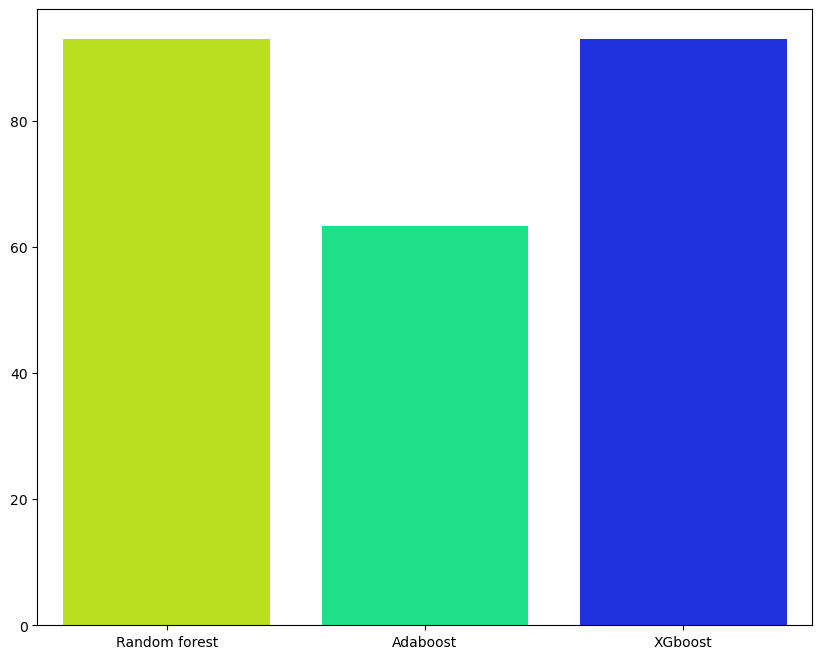

In [59]:
plt.figure(figsize=(10,8))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='gist_rainbow');